In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Function to load and preprocess the text
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# Function to compare reports using Cosine Similarity
def compare_reports_cosine(ground_truth, model_reports):
    # Create a TfidfVectorizer to vectorize the text
    vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

    # Combine ground truth and model reports into a list
    all_reports = [ground_truth] + list(model_reports.values())

    # Vectorize the texts
    tfidf_matrix = vectorizer.fit_transform(all_reports)

    # Calculate cosine similarity between ground truth (first element) and each model
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

    # Prepare results
    results = {}
    for i, (model_name, _) in enumerate(model_reports.items()):
        results[model_name] = cosine_similarities[i]

    return results

# Load content from files
gt_text = load_text('/Users/petrakuralt/Downloads/GT.rtf')
gams_text = load_text('/Users/petrakuralt/Downloads/gams.rtf')
deepseek_text = load_text('/Users/petrakuralt/Downloads/Deepseek.rtf')
gemini_text = load_text('/Users/petrakuralt/Downloads/Gemini.rtf')

# Define model reports
model_reports = {
    'Gams': gams_text,
    'Deepseek': deepseek_text,
    'Gemini': gemini_text
}

# Perform comparison using cosine similarity
similarity_scores = compare_reports_cosine(gt_text, model_reports)

# Display the results
for model, score in similarity_scores.items():
    print(f"Cosine Similarity between Ground Truth and {model}: {score:.4f}")


Cosine Similarity between Ground Truth and Gams: 0.4158
Cosine Similarity between Ground Truth and Deepseek: 0.4204
Cosine Similarity between Ground Truth and Gemini: 0.4073


In [14]:
from rouge_score import rouge_scorer

# Function to load and preprocess the text
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

# Function to compare reports using ROUGE score
def compare_reports_rouge(ground_truth, model_reports):
    # Initialize the ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Dictionary to hold the ROUGE scores for each model
    results = {}

    # Calculate ROUGE score for each model
    for model_name, report in model_reports.items():
        scores = scorer.score(ground_truth, report)
        results[model_name] = scores

    return results

# Load content from files
gt_text = load_text('/Users/petrakuralt/Downloads/GT.rtf')
gams_text = load_text('/Users/petrakuralt/Downloads//gams.rtf')
deepseek_text = load_text('/Users/petrakuralt/Downloads//Deepseek.rtf')
gemini_text = load_text('/Users/petrakuralt/Downloads//Gemini.rtf')

# Define model reports
model_reports = {
    'Gams': gams_text,
    'Deepseek': deepseek_text,
    'Gemini': gemini_text
}

# Perform comparison using ROUGE score
rouge_scores = compare_reports_rouge(gt_text, model_reports)

# Display the results
for model, scores in rouge_scores.items():
    print(f"ROUGE Scores for {model}:")
    print(f"  ROUGE-1: {scores['rouge1']}")
    print(f"  ROUGE-2: {scores['rouge2']}")
    print(f"  ROUGE-L: {scores['rougeL']}")
    print('-' * 40)

ROUGE Scores for Gams:
  ROUGE-1: Score(precision=0.5193798449612403, recall=0.5877192982456141, fmeasure=0.551440329218107)
  ROUGE-2: Score(precision=0.3125, recall=0.35398230088495575, fmeasure=0.3319502074688797)
  ROUGE-L: Score(precision=0.40310077519379844, recall=0.45614035087719296, fmeasure=0.4279835390946502)
----------------------------------------
ROUGE Scores for Deepseek:
  ROUGE-1: Score(precision=0.4260355029585799, recall=0.631578947368421, fmeasure=0.5088339222614842)
  ROUGE-2: Score(precision=0.25, recall=0.37168141592920356, fmeasure=0.298932384341637)
  ROUGE-L: Score(precision=0.33136094674556216, recall=0.49122807017543857, fmeasure=0.39575971731448767)
----------------------------------------
ROUGE Scores for Gemini:
  ROUGE-1: Score(precision=0.4319526627218935, recall=0.6403508771929824, fmeasure=0.5159010600706714)
  ROUGE-2: Score(precision=0.2619047619047619, recall=0.3893805309734513, fmeasure=0.31316725978647686)
  ROUGE-L: Score(precision=0.32544378698

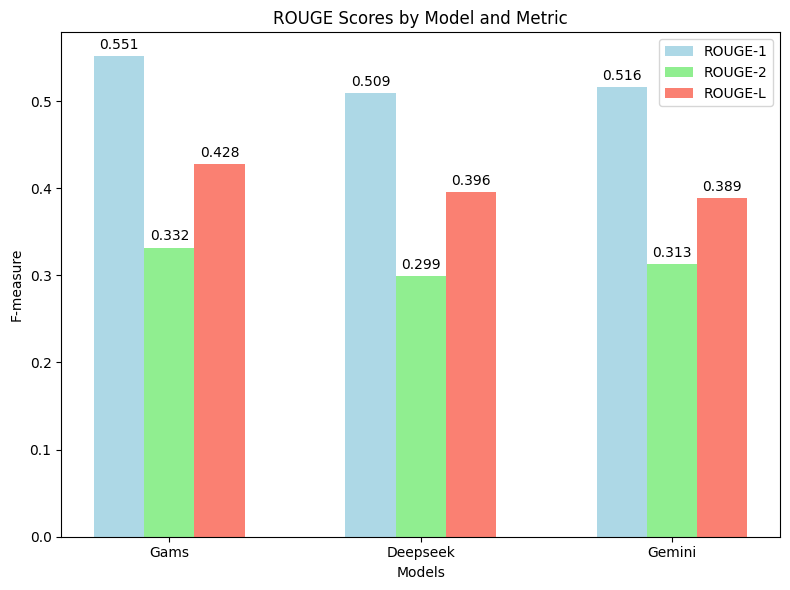

In [15]:
import numpy as np

# Extracting metrics for plotting
models = list(rouge_scores.keys())
rouge1_fmeasure = [rouge_scores[model]['rouge1'].fmeasure for model in models]
rouge2_fmeasure = [rouge_scores[model]['rouge2'].fmeasure for model in models]
rougeL_fmeasure = [rouge_scores[model]['rougeL'].fmeasure for model in models]

# Set up the plot
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting bars for each ROUGE metric
rects1 = ax.bar(x - width, rouge1_fmeasure, width, label='ROUGE-1', color='lightblue')
rects2 = ax.bar(x, rouge2_fmeasure, width, label='ROUGE-2', color='lightgreen')
rects3 = ax.bar(x + width, rougeL_fmeasure, width, label='ROUGE-L', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('F-measure')
ax.set_title('ROUGE Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Autolabel function to display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call autolabel for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Display the plot
plt.tight_layout()
plt.show()

In [2]:
from bert_score import score
from striprtf.striprtf import rtf_to_text

# Function to load text from RTF file
def load_rtf(file_path):
    with open(file_path, 'rb') as file:
        rtf_content = file.read()
    text = rtf_to_text(rtf_content.decode('utf-8', errors='ignore'))
    return text

# Load content from RTF files
gt_text = load_rtf('/Users/petrakuralt/Downloads/GT.rtf')  # Ground Truth RTF file
gams_text = load_rtf('/Users/petrakuralt/Downloads/gams.rtf')  # Gams model output
deepseek_text = load_rtf('/Users/petrakuralt/Downloads/Deepseek.rtf')  # Deepseek model output
gemini_text = load_rtf('/Users/petrakuralt/Downloads/Gemini.rtf')  # Gemini model output

# Example texts for BERTScore calculation
ground_truth = gt_text
models = {
    'Gams': gams_text,
    'Deepseek': deepseek_text,
    'Gemini': gemini_text
}

# Apply BERTScore to compare each model output with the ground truth
for model_name, model_output in models.items():
    P, R, F1 = score([model_output], [ground_truth], lang='en')
    print(f"BERTScore for {model_name}:")
    print(f"  Precision: {P.mean().item():.4f}")
    print(f"  Recall: {R.mean().item():.4f}")
    print(f"  F1: {F1.mean().item():.4f}")
    print('-' * 40)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore for Gams:
  Precision: 0.8566
  Recall: 0.8613
  F1: 0.8589
----------------------------------------


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore for Deepseek:
  Precision: 0.8534
  Recall: 0.8728
  F1: 0.8630
----------------------------------------


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore for Gemini:
  Precision: 0.8565
  Recall: 0.8710
  F1: 0.8637
----------------------------------------
